In [1]:
# Supplementary Figures 
## Figure S4. Cumulative annual timeseries of daily mean flux data

In [1]:
import sys
import os, glob
import csv 
import calendar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
from pyfunctions import *

/Users/linniahawkins/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load daily mean data
# set daytime SW threshold
sw_thresh = -10 # W/m2

df_ca3 = load_daily_data('CA-Ca3',sw_thresh)
df_me6 = load_daily_data('US-Me6',sw_thresh)
df_wref = load_daily_data('WREF',sw_thresh)
df_abby = load_daily_data('ABBY',sw_thresh)

/Users/linniahawkins/Documents/Ameriflux/heatdome_analysis/heatwave_analysis/code/pyfunctions.py:77: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  da = data[var][pd.datetime(2002,1,1):pd.datetime(2022,12,31)]*lh_scaler
<ipython-input-5-9dbe5c35e186>:22: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax1.plot(np.arange(1,366,1),data[pd.datetime(2021,1,1,0,0,0):pd.datetime(2021,12,31,23,59,59)],c='lightgrey',label=site_years[i])
<ipython-input-5-9dbe5c35e186>:23: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax1.plot(np.arange(1,366,1),data[pd.datetime(2021,1,1,0,0,0):pd.datetime(2021,12,31,23,59,59)],c='k',label='2021')
/Users/linniahawkins/Documents/Ameriflux/heatdome_analysis/heatwave_ana

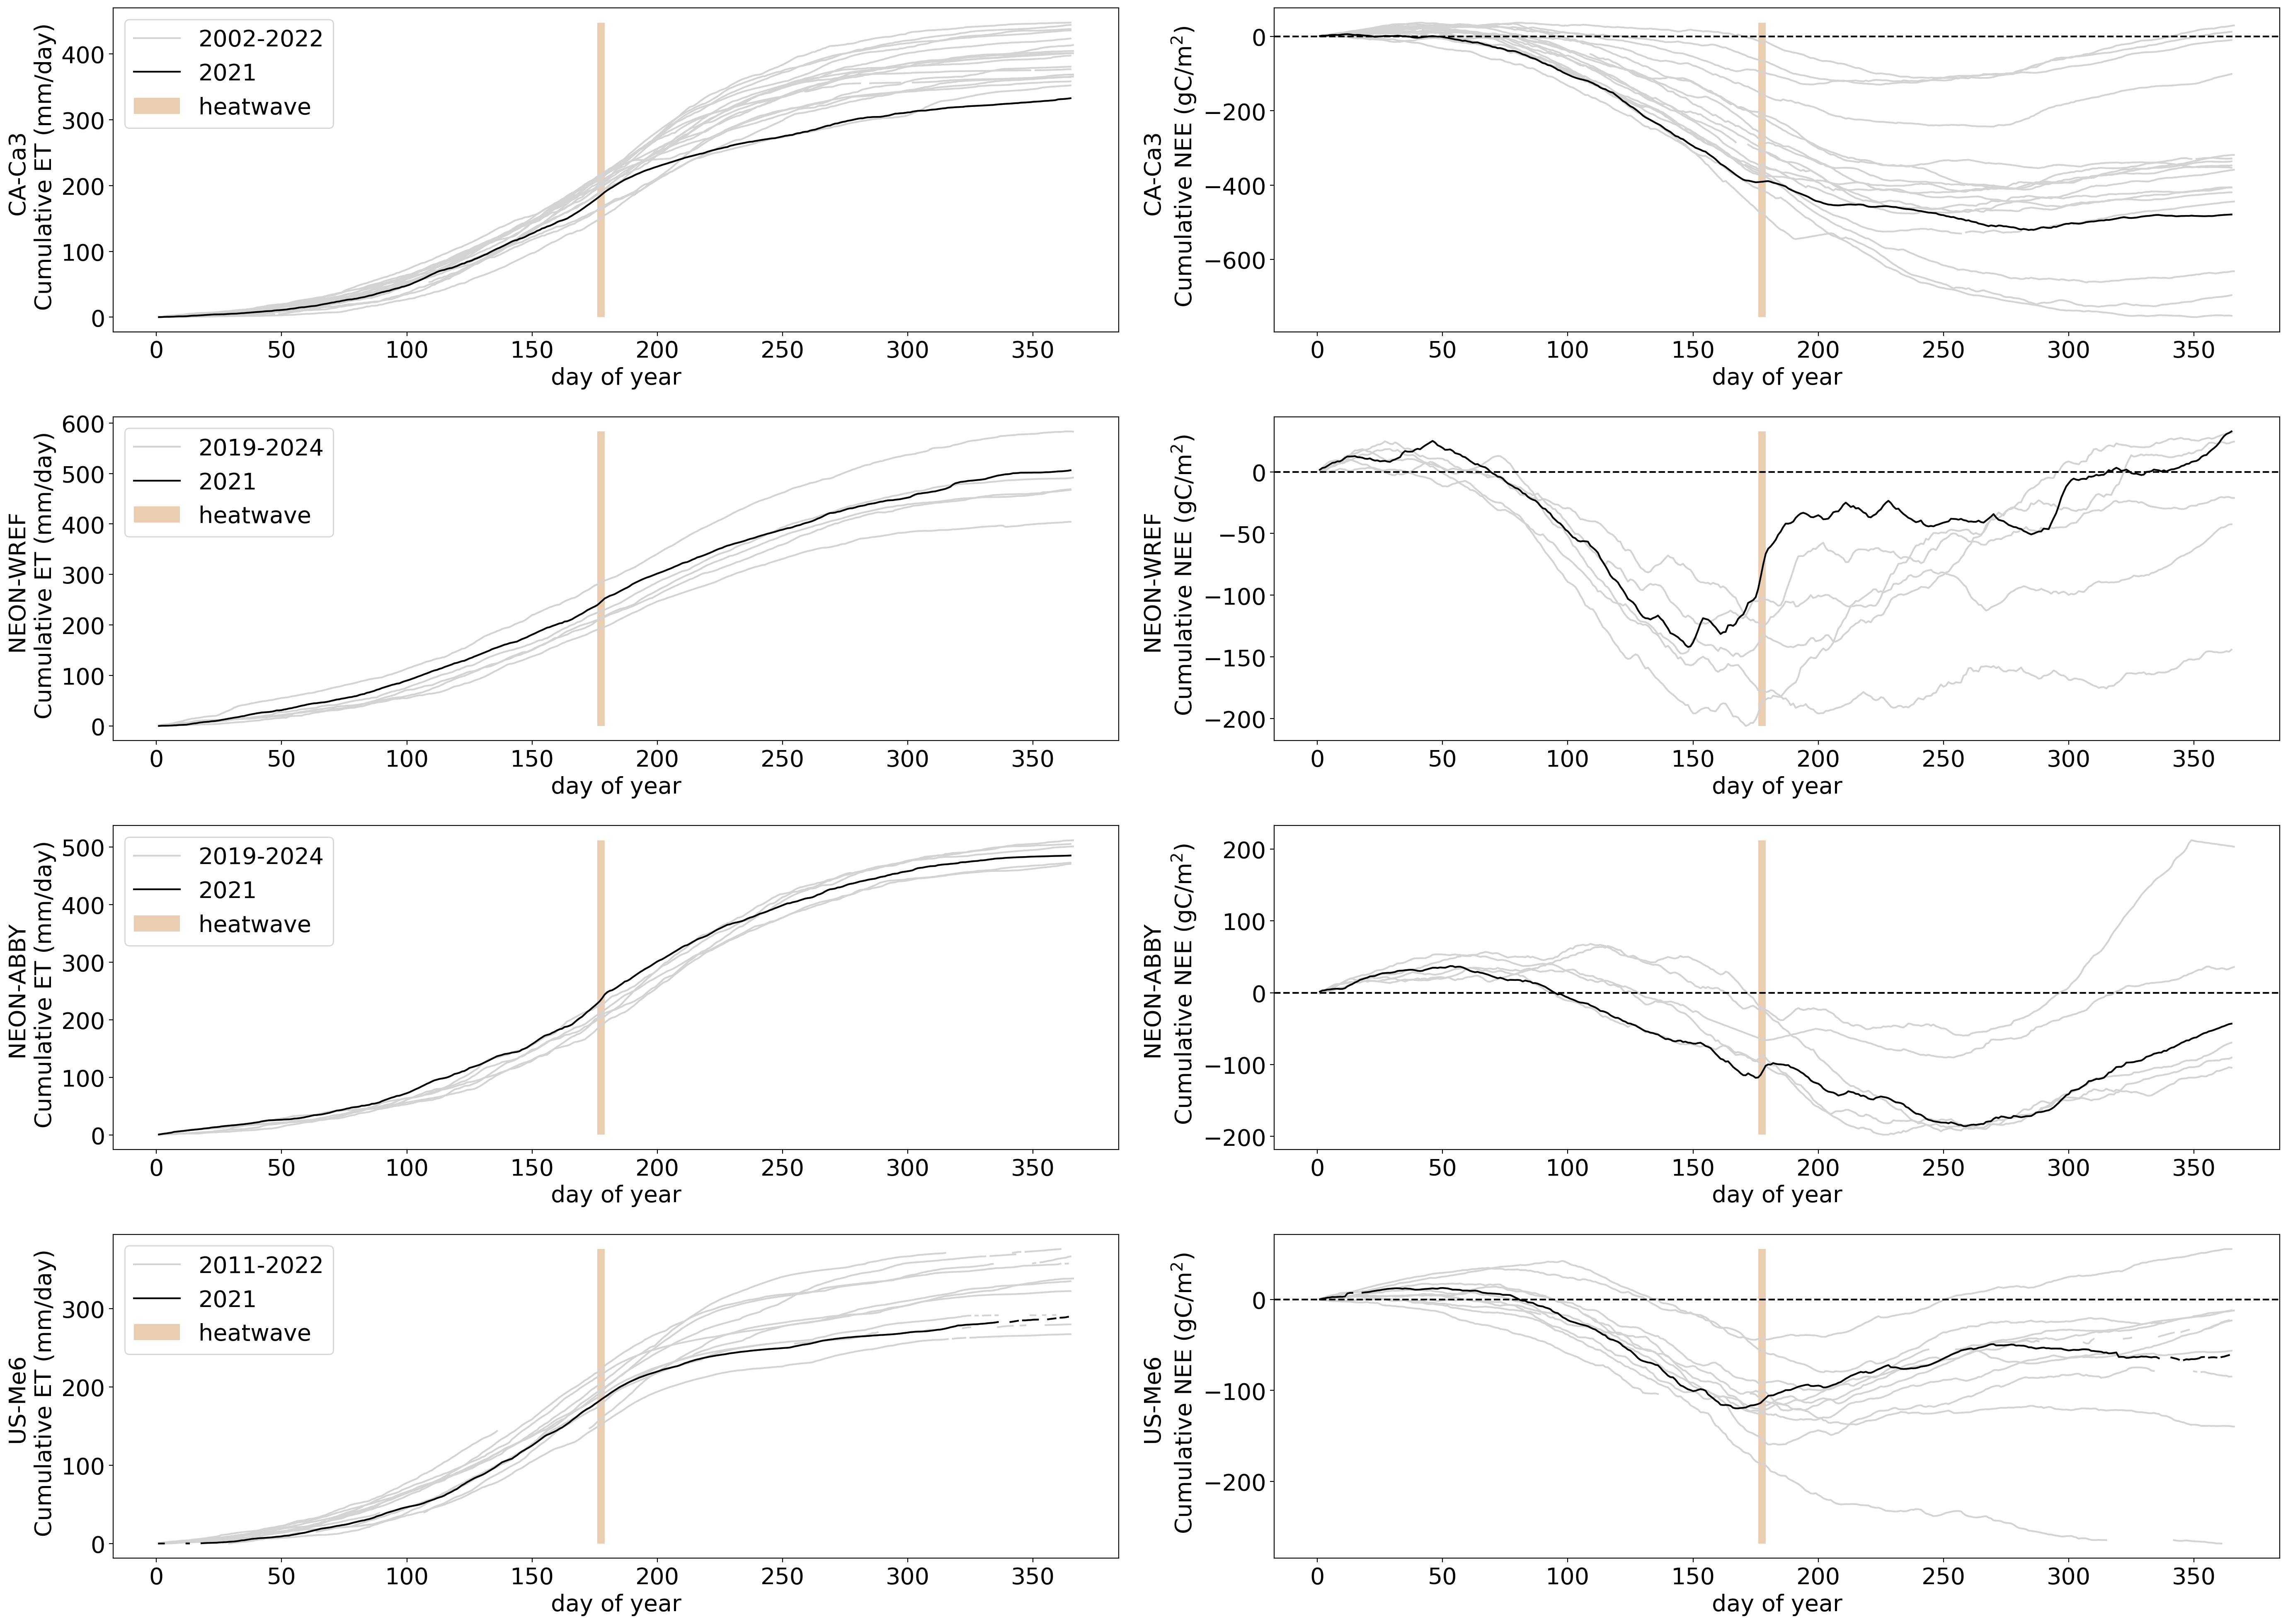

In [5]:
# cumulative plots
plt.figure(num=None, figsize=(28, 20), dpi=200, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.15, bottom=.1, right=.9, top=.95, wspace=0.15, hspace=0.15)
plt.rcParams.update({'font.size': 20})
x2 = np.arange(176,180)

sites = ['CA-Ca3','NEON-WREF','NEON-ABBY','US-Me6']
datasets = [df_ca3,df_wref,df_abby,df_me6]
site_years = ['2002-2022','2019-2024','2019-2024','2011-2022']
variables = ['LH','NEE']
labels = ['ET','NEE']
units = ['(mm/day)','(gC/m$^2$)']

k = 1
for i,site in enumerate(sites):
    for j,var in enumerate(variables):
            data = get_cumulative(site,datasets[i],var)
            anncum = data.groupby([data.index.dayofyear, data.index.year]).max().unstack()

            ax1 = plt.subplot(4,2,k)
            ax1.plot(anncum,color='lightgrey')
            ax1.plot(np.arange(1,366,1),data[pd.datetime(2021,1,1,0,0,0):pd.datetime(2021,12,31,23,59,59)],c='lightgrey',label=site_years[i])
            ax1.plot(np.arange(1,366,1),data[pd.datetime(2021,1,1,0,0,0):pd.datetime(2021,12,31,23,59,59)],c='k',label='2021')
            ax1.fill_between(x2, np.tile(np.min(data),len(x2)),np.tile(np.max(data),len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
            ax1.set_xlabel('day of year')
            ax1.set_ylabel(site+' \n '+ r'Cumulative '+labels[j]+' '+units[j])
            if j==1:
                plt.axhline(0,linestyle='--',color = 'k')
            if j==0:
                plt.legend(loc='upper left')
            k = k+1

plt.tight_layout()
plt.savefig('../figs/Annual_cumulative_LH-NEE.png',dpi=200)

In [ ]:
# cumulative plots
plt.figure(num=None, figsize=(28, 20), dpi=200, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.15, bottom=.1, right=.9, top=.95, wspace=0.15, hspace=0.15)
plt.rcParams.update({'font.size': 20})
x2 = np.arange(176,180)

sites = ['CA-Ca3','NEON-WREF','NEON-ABBY','US-Me6']
datasets = [df_ca3,df_wref,df_abby,df_me6]
site_years = ['2002-2022','2019-2024','2019-2024','2011-2022']
variables = ['GPP','RECO']
labels = ['GPP','RECO']
#units = ['(W/m$^2$)','(umol/m$^2$)','(umol/m$^2$)']
units = ['(gC/m$^2$)','(gC/m$^2$)']

k = 1
for i,site in enumerate(sites):
    for j,var in enumerate(variables):
            data = get_cumulative(site,datasets[i],var)
            anncum = data.groupby([data.index.dayofyear, data.index.year]).max().unstack()

            ax1 = plt.subplot(4,2,k)
            ax1.plot(anncum,color='lightgrey')
            ax1.plot(np.arange(1,366,1),data[pd.datetime(2021,1,1,0,0,0):pd.datetime(2021,12,31,23,59,59)],c='lightgrey',label=site_years[i])
            ax1.plot(np.arange(1,366,1),data[pd.datetime(2021,1,1,0,0,0):pd.datetime(2021,12,31,23,59,59)],c='k',label='2021')
            ax1.fill_between(x2, np.tile(np.min(data),len(x2)),np.tile(np.max(data),len(x2)),facecolor='peru',alpha=0.4,label='heatwave')
            ax1.set_xlabel('day of year')
            ax1.set_ylabel(site+' \n '+ r'Cumulative '+labels[j]+' '+units[j])
            if j==1:
                plt.axhline(0,linestyle='--',color = 'k')
            if j==0:
                plt.legend(loc='upper left')
            k = k+1

plt.tight_layout()
plt.savefig('../figs/Annual_cumulative_GPP-RECO.png',dpi=200)
